In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.simplefilter('ignore')

In [2]:
rodent_rm_df = pd.DataFrame(pd.read_csv('1kmerized.Rodentia.csv')['genus name'].value_counts()[:30])
rodent_rm_df.columns = ['species count']
rodent_rm_df.insert(0, 'species name', rodent_rm_df.index, True)
rodent_rm_df.index = np.arange(len(rodent_rm_df))
rodent_rm_df

,species name,species count
0,Praomys,65
1,Rattus,58
2,Hylomyscus,45
3,Cricetulus,40
4,Apodemus,39
5,Ctenomys,36
6,Mastomys,32
7,Niviventer,24
8,Neodon,22
9,Myodes,17


In [3]:
rodent_org_df = pd.DataFrame(pd.read_csv('../raw_data/Rodentia.csv')['genus_name'].value_counts())
rodent_org_df.columns = ['species count']
rodent_org_df.insert(0, 'species name', rodent_org_df.index, True)
rodent_org_df.index = np.arange(len(rodent_org_df))
rodent_org_df

,species name,species count
0,Peromyscus,379
1,Liomys,286
2,Rattus,281
3,Oryzomys,263
4,Proechimys,188
...,...,...
126,Chiropodomys,1
127,Lemniscomys,1
128,Echimys,1
129,Eolagurus,1


In [4]:
joined_rodent = pd.DataFrame(pd.merge(rodent_rm_df, rodent_org_df, on='species name'))
joined_rodent

,species name,species count_x,species count_y
0,Praomys,65,159
1,Rattus,58,281
2,Hylomyscus,45,105
3,Cricetulus,40,45
4,Apodemus,39,106
5,Ctenomys,36,66
6,Mastomys,32,153
7,Niviventer,24,86
8,Neodon,22,31
9,Myodes,17,102


In [5]:
rodent_ratio = joined_rodent[['species count_x']].div(joined_rodent['species count_y'], axis=0).apply(lambda x: round(x*100, 2))
rodent_ratio.columns = ['removed %']
rodent_final = pd.concat([joined_rodent, rodent_ratio], axis=1).sort_values(by='removed %', ascending=False)
rodent_final

,species name,species count_x,species count_y,removed %
26,Caryomys,2,2,100.00
25,Juliomys,2,2,100.00
22,Micromys,3,3,100.00
3,Cricetulus,40,45,88.89
18,Dipus,4,5,80.00
11,Allactaga,13,18,72.22
17,Bandicota,5,7,71.43
8,Neodon,22,31,70.97
19,Meriones,4,7,57.14
5,Ctenomys,36,66,54.55


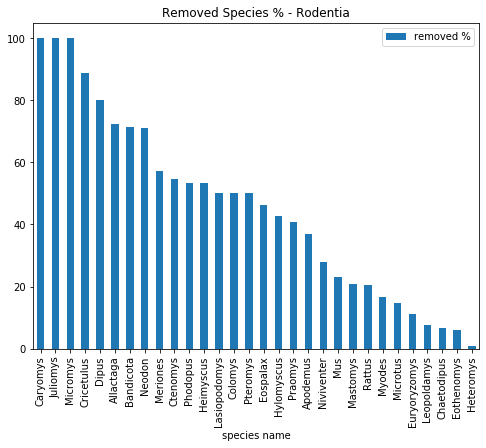

In [6]:
rodent_final.plot(x='species name', y=['removed %'], kind='bar', figsize=(8,6), title='Removed Species % - Rodentia')

In [7]:
aves_rm_df = pd.DataFrame(pd.read_csv('1kmerized.Aves.csv')['genus name'].value_counts()[:30])
aves_rm_df.columns = ['species count']
aves_rm_df.insert(0, 'species name', aves_rm_df.index, True)
aves_rm_df.index = np.arange(len(aves_rm_df))
aves_rm_df

,species name,species count
0,Turdus,16
1,Tangara,13
2,Emberiza,12
3,Euphonia,11
4,Cyanistes,11
5,Basileuterus,9
6,Anas,9
7,Corvus,9
8,Sylvia,8
9,Larus,8


In [8]:
aves_org_df = pd.DataFrame(pd.read_csv('../raw_data/Aves.csv')['genus_name'].value_counts())
aves_org_df.columns = ['species count']
aves_org_df.insert(0, 'species name', aves_org_df.index, True)
aves_org_df.index = np.arange(len(aves_org_df))
aves_org_df

,species name,species count
0,Gallus,84
1,Turdus,82
2,Anas,66
3,Pycnonotus,56
4,Carduelis,56
...,...,...
998,Alethe,1
999,Myrmothera,1
1000,Pyrrhocorax,1
1001,Rupicola,1


In [9]:
joined_aves = pd.DataFrame(pd.merge(aves_rm_df, aves_org_df, on='species name'))
joined_aves

,species name,species count_x,species count_y
0,Turdus,16,82
1,Tangara,13,14
2,Emberiza,12,49
3,Euphonia,11,20
4,Cyanistes,11,17
5,Basileuterus,9,19
6,Anas,9,66
7,Corvus,9,35
8,Sylvia,8,25
9,Larus,8,42


In [10]:
aves_ratio = joined_aves[['species count_x']].div(joined_aves['species count_y'], axis=0).apply(lambda x: round(x*100, 2))
aves_ratio.columns = ['removed %']
aves_final = pd.concat([joined_aves, aves_ratio], axis=1).sort_values(by='removed %', ascending=False)
aves_final

,species name,species count_x,species count_y,removed %
22,Myrmeciza,6,6,100.00
1,Tangara,13,14,92.86
16,Cercomacra,7,8,87.50
27,Penelope,5,6,83.33
10,Pachyramphus,8,10,80.00
15,Patagioenas,7,10,70.00
4,Cyanistes,11,17,64.71
13,Celeus,7,11,63.64
18,Aratinga,7,11,63.64
3,Euphonia,11,20,55.00


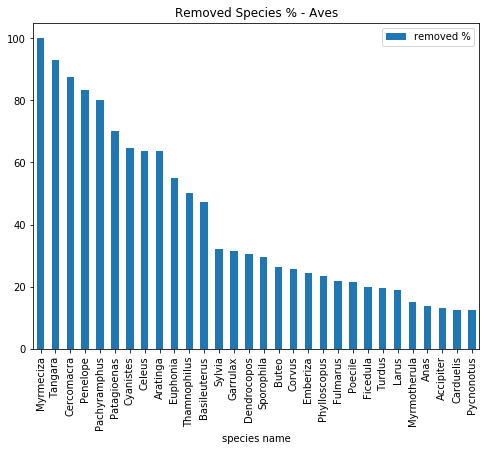

In [11]:
aves_final.plot(x='species name', y=['removed %'], kind='bar', figsize=(8,6), title='Removed Species % - Aves')

In [12]:
chirop_rm_df = pd.DataFrame(pd.read_csv('1kmerized.Chiroptera.csv')['genus name'].value_counts())
chirop_rm_df.columns = ['species count']
chirop_rm_df.insert(0, 'species name', chirop_rm_df.index, True)
chirop_rm_df.index = np.arange(len(chirop_rm_df))
chirop_rm_df

,species name,species count
0,Pteronotus,3
1,Rhynchonycteris,2
2,Lasiurus,2
3,Pipistrellus,1
4,Micronycteris,1
5,Myotis,1


In [13]:
chirop_org_df = pd.DataFrame(pd.read_csv('../raw_data/Chiroptera.csv')['genus_name'].value_counts())
chirop_org_df.columns = ['species count']
chirop_org_df.insert(0, 'species name', chirop_org_df.index, True)
chirop_org_df.index = np.arange(len(chirop_org_df))
chirop_org_df

,species name,species count
0,Artibeus,967
1,Carollia,470
2,Myotis,269
3,Rhinolophus,243
4,Sturnira,157
...,...,...
117,Mosia,1
118,Chalinolobus,1
119,Megaloglossus,1
120,Barbastella,1


In [14]:
joined_chirop = pd.DataFrame(pd.merge(chirop_rm_df, chirop_org_df, on='species name'))
joined_chirop

,species name,species count_x,species count_y
0,Pteronotus,3,147
1,Rhynchonycteris,2,29
2,Lasiurus,2,45
3,Pipistrellus,1,89
4,Micronycteris,1,21
5,Myotis,1,269


In [15]:
chirop_ratio = joined_chirop[['species count_x']].div(joined_chirop['species count_y'], axis=0).apply(lambda x: round(x*100, 2))
chirop_ratio.columns = ['removed %']
chirop_final = pd.concat([joined_chirop, chirop_ratio], axis=1).sort_values(by='removed %', ascending=False)
chirop_final

,species name,species count_x,species count_y,removed %
1,Rhynchonycteris,2,29,6.90
4,Micronycteris,1,21,4.76
2,Lasiurus,2,45,4.44
0,Pteronotus,3,147,2.04
3,Pipistrellus,1,89,1.12
5,Myotis,1,269,0.37


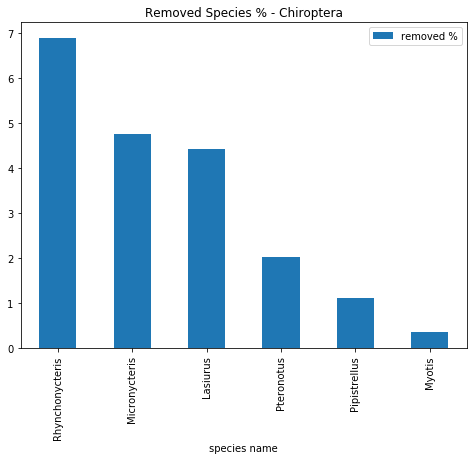

In [16]:
chirop_final.plot(x='species name', y=['removed %'], kind='bar', figsize=(8,6), title='Removed Species % - Chiroptera')

# K-Samples Anderson-Darling Test

In [17]:
from scipy.stats import anderson_ksamp

In [18]:
rodent_removed = np.array(pd.read_csv('1kmerized.Rodentia.csv')['genus name'])
rodent_original = np.array(pd.read_csv('../raw_data/Rodentia.csv')['genus_name'])
ak_test_aves = anderson_ksamp([rodent_removed, rodent_original])
ak_test_aves

Anderson_ksampResult(statistic=56.91253213434344, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

In [19]:
aves_removed = np.array(pd.read_csv('1kmerized.Aves.csv')['genus name'])
aves_original = np.array(pd.read_csv('../raw_data/Aves.csv')['genus_name'])
ak_test_aves = anderson_ksamp([aves_removed, aves_original])
ak_test_aves

Anderson_ksampResult(statistic=-0.17245177435094056, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

In [20]:
chirop_removed = np.array(pd.read_csv('1kmerized.Chiroptera.csv')['genus name'])
chirop_original = np.array(pd.read_csv('../raw_data/Chiroptera.csv')['genus_name'])
ak_test_chirop = anderson_ksamp([chirop_removed, chirop_original])
ak_test_chirop

Anderson_ksampResult(statistic=2.993564819053475, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.019587162609212633)